# 4. Eigenvalues and Eigenvectors

In [15]:
import numpy as np
from numpy import linalg

## 4.1 Eigenvalues and Eigenvectors

This section introduces eigenvalues and eigenvectors of a square matrix and explore some of its applications. 
The goal of this section is to dissect the action of linear maps into elements that are easiy to visualize. 

## Motivation

Consider a linear map $T: \mathbb{R}^n\to \mathbb{R}^m$ defined by $\vec{x} \mapsto A\vec{x}$. Although $T$ moves $\vec{x}$ in veraity of directions but there are some vectors on which the action of $T$ is easy to underestand. For example, suppose $A = \begin{bmatrix} 3 & -2 \\ 1 & 0\\ \end{bmatrix}$, $\vec{u
} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$. Let's compute $A\vec{u}$

In [2]:
A = np.array([[3,-2], [1,0]])
u = np.array([2,1])

A @ u


array([4, 2])

We can see that the image of $\vec{u
} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$ is 
$$
A\vec{u
} = \begin{bmatrix} 4 \\ 2 \end{bmatrix} = 2 \begin{bmatrix} 2 \\ 1 \end{bmatrix} = 2 \vec{u}$$

In fact, $A$ _streches_ $\vec{u}$. 

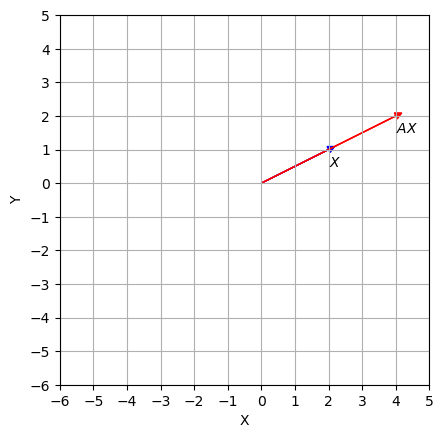

In [3]:
import matplotlib.pyplot as plt


def plot_map(vector, matrix):
    x1 = vector[0]
    y1 = vector[1]
    
    x2 = (A @ vector)[0]
    y2 = (A @ vector)[1]

    ax = plt.axes()
    
    ax.arrow(0, 0, x1, y1, head_width = 0.2,head_length = 0.2, fc ='b', ec ='b')
    ax.arrow(0, 0, x2, y2, head_width = 0.2,head_length = 0.2, fc ='r', ec ='r')

    ax.text(x1,y1 - 0.5,'$X$')
    ax.text(x2,y2-0.5,'$AX$')

    z = max(np.abs(x1), np.abs(x2), np.abs(y1),np.abs(y2))
            
    ax.set_xticks(np.arange(-z-2, z+2, step = 1))
    ax.set_yticks(np.arange(-z-2, z+2, step = 1))
    ax.set_aspect('equal')

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    
    plt.grid()
    plt.show()


plot_map(u, A)

We are interested in such special vectors that, when transformed by matrix $A$, result in a scalar multiple of themselves. More generally, let $A$ be an $n\times n$ matrix. We seek non-trivial solutions to equations of the form:

$$
A\vec{x} = \lambda \vec{x} \quad \text{for some }\quad \lambda\in \mathbb{R}
$$

If $\vec{u}\neq 0$ is a solution for some $\lambda$, we call $\lambda$ an __eigenvalue__ and $\vec{u}$ an __eigenvector__ of $A$ corresponding to $\lambda$.

```{admonition} Example 1

Consider the matrix equation:

$$
A\vec{u} = \begin{bmatrix} 4 \\ 2 \end{bmatrix} = 2 \begin{bmatrix} 2 \\ 1 \end{bmatrix} = 2 \vec{u}
$$

Observe that $\lambda = 2$ is an eigenvalue of $A$ and $\vec{u}$ is the corresponding eigenvector.

a. Is $\vec{v} = \begin{bmatrix} 1 \\ -1 \end{bmatrix}$ also an eigenvector of $A$?

b. Is $\lambda = 4$ an eigenvalue?

c. Show that $\lambda = 1$ is an eigenvalue and find an eigenvector for it.

```

__Solution__:

(a) Let's compute $A\vec{v}$:

In [5]:
v = np.array([1, -1])

A @ v

array([5, 1])

If there were a $\lambda$ such that $A\vec{v} = \lambda \vec{v}$, we would have obtained:

$$
\begin{bmatrix} 1 \\ -1 \end{bmatrix} = \lambda \begin{bmatrix} 5 \\ 1 \end{bmatrix}
$$

Which is not possible for any value of $\lambda$, and as can be seen in the figure below, the vector $\vec{v}$ does not satisfy the eigenvalue equation. 

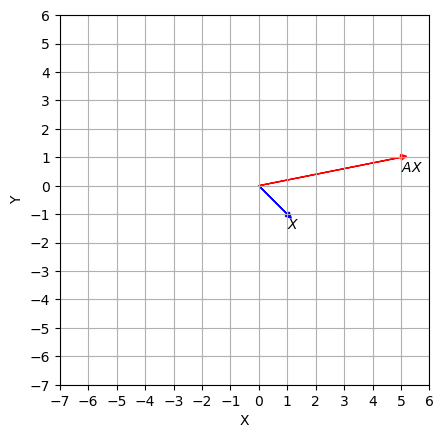

In [6]:
plot_map(v, A)


(b) No.  $\lambda = 4$ is a eigenvalue for $A$ if and only if $A\vec{x} = 4 \vec{x}$ has a non-trivial solution. Let's reformulate this problem in terms of a homogenous equation which is easier to deal with:

$$
A\vec{x} = 4 \vec{x}  \quad \iff \quad (A - 4 I_2) \vec{x} = 0
$$

The homogeneous equation $(A - 4 I_2) \vec{x} = 0$ has a non-trivial solution if and only if it has a free variable (a non-pivot column).

In [8]:
# identity matrix I_2
I_2 = np.eye(2)

A - 4*I_2

array([[-1., -2.],
       [ 1., -4.]])

Clearly, the columns of $A -4I$ are linearly independent; as a result, there is no free variable and the system has only trivial solution $\vec{x} = 0$. 


(c) $\lambda = 1$ is a eigenvalue for $A$ if and only if $A\vec{x} = 1 \vec{x}$ has a non-trivial solution. 
$$
A\vec{x} = \vec{x} \quad \iff \quad (A - I_2) \vec{x} = \vec{0}
$$


In [9]:
A - I_2

array([[ 2., -2.],
       [ 1., -1.]])

Since the columns of $(A - I_2)$ are linearly independent, there is a free variable and $\lambda = 1$ is an eigenvalue of $A$. To find a correponding eigenvector $\vec{u}$ we solve
$$(A - I_2)\vec{x} = 0$$ 

Let's set up the augmented matrix: 

In [10]:
# the augmented vector
b = np.array([[0],[0]])

# add to the matrix
M = np.concatenate((A - I_2, b), axis = 1) 
M

array([[ 2., -2.,  0.],
       [ 1., -1.,  0.]])

Let's recall the row operations: 

In [11]:
def swap(matrix, row1, row2):
    
    copy_matrix=np.copy(matrix).astype('float64') 
  
    copy_matrix[row1,:] = matrix[row2,:]
    copy_matrix[row2,:] = matrix[row1,:]
    
    return copy_matrix

# Replacing a row by the sum of itself and a multiple of another 

def replace(matrix, row1, row2, scalar):
    copy_matrix=np.copy(matrix).astype('float64')
    copy_matrix[row1] = matrix[row1]+ scalar * matrix[row2] 
    return copy_matrix

In [12]:
M1 = swap(M, 0, 1)
M1

array([[ 1., -1.,  0.],
       [ 2., -2.,  0.]])

In [13]:
M2 = replace(M1, 1, 0, -2)
M2

array([[ 1., -1.,  0.],
       [ 0.,  0.,  0.]])

A general solution for $(A - I_2)\vec{x} = 0$ is 

$$
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} x_2 \\ x_2 \end{bmatrix} = x_2 \begin{bmatrix} 1 \\ 1 \end{bmatrix}, 
$$

and the set of all solutions is 

$$
\text{span}\left( \ \begin{bmatrix} 1 \\ 1 \end{bmatrix} \ \right)
$$

each non-zero element of this set is an eigenvector corresponding to $\lambda = 1$. 


The above simple example leads to a general case:


```{admonition} Theorem 17
:class: tip

Let $A$ be an $n\times n$ matrix and $\lambda$ be a scalar. The following statements are equivalent:

1. $\lambda$ is an eigenvalue of $A$.

2. $(A - \lambda I_n) \vec{x} = 0 $ has non-trivial solution.

3. $det(A - \lambda I_n) = 0$
```

## Eigenspace and characteristic polynomial

$null(A - \lambda I_n)$ is a subspace of $\mathbb{R}^n$ and contains the zero vector and all eigenvectors corresponding to $\lambda$. This subspace is known as the __eigenspace__ of $A$ corresponding to $\lambda$, and is denoted by $E_{\lambda}$. Intuitively, a matrix acts as dilations on its eigenspaces.

```{admonition} Example 2

The set

$$
\text{span}\left( \ \begin{bmatrix} 1 \\ 1 \end{bmatrix} \ \right)
$$

Which we found in Example 1, is in fact the eigenspace $E_1$ of $A$ corresponding to $\lambda =1$. And any vector $\vec{u} \in E_1$ is preserved under the action of $A$ (dilations factor = 1): 

$$
A\vec{u} = \vec{u}
$$


The _polynomial_ $P(\lambda) = \det(A - \lambda I_n)$ is called the __characteristic polynomial__ of $A$. The zeros of this polynomial are precisely the eigenvalues of $A$. Thus, the polynomial can be factorized as:

$$
P(\lambda) = (\lambda - \lambda_0)^{m_0} (\lambda - \lambda_1)^{m_1} \dots (\lambda - \lambda_k)^{m_k}
$$

For each $\lambda_i$, where $0 \leq i \leq k$, the power $m_i$ is known as __the algebraic multiplicity__ of $\lambda_i$.
```

```{admonition} Example 3

Suppose 

$$
A = \begin{bmatrix} 4 & -1 & 6 \\ 0 & 1 & 6 \\ 0 & 0 & 8 \end{bmatrix}.
$$$

We will find all eigenvalues and their multiplicities of $A$ by finding its characteristic polynomial.

```

__Solution:__

The characteristic polynomial is given by:

$$
\det(A - \lambda I_3) = \begin{vmatrix} 4-\lambda & -1 & 6 \\ 0 & 1-\lambda & 6\\ 0 & 0 & 8-\lambda \end{vmatrix} = 0
$$

Expanding the determinant, we obtain the characteristic polynomial:

$$
P(\lambda) = (4 - \lambda)(1 - \lambda)(8 -\lambda),
$$

The zeros of this polynomial (the eigenvalues of $A$) are $\lambda = 4$ with multiplicity $1$, $\lambda = 1$ with multiplicity $1$, and $\lambda = 8$ with multiplicity $1$.


```{admonition} Example 4

Let $A$ be the matrix given in Example 2. For each eigenvalue that we found in Example 2, find the corresponding eigenspace together with its dimention.

```
__Solution:__

The eigenspace coresponding to $\lambda = 4$:

$$
E_4 = null(A - 4I) = \{ \vec{x}: \ \ \ (A - 4I)\vec{x} = 0 \} =
$$

$$
 \left\{\  \begin{bmatrix} x\\ y\\ z  \end{bmatrix}: \ \ \ \begin{bmatrix} 0 & -1 & 6 \\ 0 & -3 & 6\\ 0 & 0 & 4 \end{bmatrix} \begin{bmatrix} x\\ y\\ z  \end{bmatrix} = 0 \  \right\} = \left\{  \  \begin{bmatrix} x\\ y\\ z  \end{bmatrix}: \ \ \ \begin{bmatrix} - y + 6z \\ -3y +6z\\ 4z \end{bmatrix} = \begin{bmatrix} 0\\ 0\\ 0  \end{bmatrix} \  \right\} 
$$

Therefore, 

$$
E_4 = \left\{ \ \begin{bmatrix} x\\ 0\\ 0  \end{bmatrix}:  x\in \mathbb{R}\ \right\} = span\left( \ \begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix} \ \right) \quad \text{and} \quad dim(E_4) = 1
$$


The eigenspace coresponding to $\lambda = 1$:


$$
E_1 = null(A - I) = \{ \vec{x}: \ \ \ (A - I)\vec{x} = 0 \} = 
$$

$$
\left\{\  \begin{bmatrix} x\\ y\\ z  \end{bmatrix}: \ \ \ \begin{bmatrix} 3 & -1 & 6 \\ 0 & 0 & 6\\ 0 & 0 & 7 \end{bmatrix} \begin{bmatrix} x\\ y\\ z  \end{bmatrix} = 0 \  \right\} = \left\{  \  \begin{bmatrix} x\\ y\\ z  \end{bmatrix}: \ \ \ \begin{bmatrix} 3x - y + 6z \\ 6z\\ 7z \end{bmatrix} = \begin{bmatrix} 0\\ 0\\ 0  \end{bmatrix} \  \right\} 
$$

Therefore, 

$$
E_1 = \left\{\begin{bmatrix} x\\ 3x\\ 0  \end{bmatrix}:  x\in \mathbb{R} \right\} = span\left(  \begin{bmatrix} 1 \\ 3 \\ 0  \end{bmatrix} \right) \quad \text{and} \quad dim(E_1) = 1
$$

The eigenspace coresponding to $\lambda = 8$

$$
E_8 = null(A - 8I) = \{ \vec{x}: \ \ \ (A - 8I)\vec{x} = 0 \} =
$$

$$
\left\{\  \begin{bmatrix} x\\ y\\ z  \end{bmatrix}: \ \ \ \begin{bmatrix} -4 & -1 & 6 \\ 0 & -7 & 6\\ 0 & 0 & 0 \end{bmatrix} \begin{bmatrix} x\\ y\\ z  \end{bmatrix} = 0 \  \right\} = \left\{  \  \begin{bmatrix} x\\ y\\ z  \end{bmatrix}: \ \ \ \begin{bmatrix} -4x - y + 6z \\ -7y + 6z\\ 0 \end{bmatrix} = \begin{bmatrix} 0\\ 0\\ 0  \end{bmatrix} \  \right\} 
$$

Therefore, 

$$
E_8 = \left\{\begin{bmatrix} \frac{6}{4}\\ 1 \\ \frac{7}{6}  \end{bmatrix}:  y\in \mathbb{R} \right\} = span\left(  \begin{bmatrix} 9 \\ 6\\ 7  \end{bmatrix} \right) \quad \text{and} \quad dim(E_8) = 1
$$


Before we move on to the nect tpoic, let us check our calculation using `numpy.linalg.eig` from NumPy linear algebra:

In [79]:
A = np.array([[4, -1, 6], [0, 1, 6], [0, 0, 8]])

evalues , evectors = np.linalg.eig(A)

for i in range(evalues.shape[0]):
    print(evalues[i], ' is an eigenvector with ', evectors[:,i], ' as the coresponding eigenvectors')

4.0  is an eigenvector with  [1. 0. 0.]  as the coresponding eigenvectors
1.0  is an eigenvector with  [0.31622777 0.9486833  0.        ]  as the coresponding eigenvectors
8.0  is an eigenvector with  [0.69853547 0.46569032 0.54330537]  as the coresponding eigenvectors


Note that `numpy.linalg.eig` returns the unit vector of eigenvalues, and that is why we see different eigen vectors. To check that let's normalize the eigenvector $\begin{bmatrix} 9\\6\\7 \end{bmatrix}$ coresponding to $\lambda = 8$: 

In [80]:
v = np.array([9,6,7])

#normalizing v 
e_v = v/np.linalg.norm(v)
e_v

array([0.69853547, 0.46569032, 0.54330537])

Let's have another look at Example 2. The eigenvalues are the entries on the main diagonal. This is always true for triangular matrices and can be proved by induction:

`````{admonition} Theorem 3 
:class: tip
Let $A$ be a square triangular matrix. Then the eigenvalues of $A$ are the entries on the diagonal.
```


__Numerical Notes__


1. Example 3 provides a method for manually computating eigenvectors in simple cases. In practical situations, using matrix program and row reduction method to find an eigenspace (for a specified eigenvalue) may not be entirely reliable. Roundoff error can occasionally lead to a reduced echelon form with the wrong number of pivots. The best computer programs compute approximations for eigenvalues and eigenvectors simultaneously, to any desired degree of accuracy, for matrices that are not too large.


2. Some software such as Mathematica and Maple can use symbolic calculations to find the characteristic polynomial of a moderate-sized matrix. But there is no formula or finite algorithm to solve the characteristic equation of a general  matrix $n\times n$ for $n\geq 5$. The best numerical methods for finding eigenvalues avoid the characteristic polynomial entirely. In fact, MATLAB finds the characteristic polynomial of a matrix $A$ by first computing the eigenvalues $\lambda_1, \lambda_2, \dots, \lambda_n$ of $A$ and then expanding the product 

$$
(\lambda -\lambda_1)(\lambda -\lambda_2)\dots (\lambda -\lambda_n)
$$



#### Exercies

```{admonition} Exercises
    
1. If $\vec{v}$ is an eigenvector of $A$ corresponding to $\lambda$, what is $A^3 \vec{v}$?   


2. If A is an $n\times n$ matrix and $2$ is an eigenvalue of $A$, show that $4$ is an eigenvalue of $2A$.

3. If $A$ is an invertible matrix with eigenvalue $\lambda$ show that $A^{-1}$ has eigenvalue $1/\lambda.$ 
    
4.  Let 

$$
A = \begin{bmatrix} 1 & 3 & 3\\ -3 & -5 &-3\\ 3 & 3 & 1 \end{bmatrix}.
$$$. 

    a. Find the eigenvalues of $A$ and their multiplicities.
    
    b. For each eigenvalue in part (a) find the corresponding eigenspace. 
    
    c. Find the dimension of each eigenspace in part (b) by finding a basis for it. How this result is related to your answer to part (a)?   

````

## 4.2 Diagonalization

This section introduces diagonalization and characterizes diagonalizability. Diagonalization is a useful factorization of a matrix $A$ based on its eigenvalue–eigenvector information. This factorization allows us to quickly access properties that are invariant under similarity, such as rank, invertibility, and eigenvalues. It also enables us to calculate powers of $A$ for large $k$, which is a fundamental concept in various applications, including discrete dynamical systems.

### Computing powers of a matrix 

Let's consider the matrix $A = \begin{bmatrix} 7 & 2\\ -4 & 1 \end{bmatrix}$. We wish to compute $A^{k}$ for an arbitrary $k\in \mathbb{N}$, given that $A= PAP^{-1}$, where $P = \begin{bmatrix} 1 & 1\\ -1 & -2 \end{bmatrix}$, and $D = \begin{bmatrix} 5 & 0\\ 0 & 3 \end{bmatrix}$.

Using this decomposition, we have:

$$
A^{k} = (PDP^{-1})(PDP^{-1})\dots (PDP^{-1}) = PD^{k}P.
$$

Since $D$ is diagonal, $D^{k} = \begin{bmatrix} 5^{k} & 0\\ 0 & 3^{k} \end{bmatrix}$. Additionally, $P^{-1} = \begin{bmatrix} 2 & 1\\ -1 & -1 \end{bmatrix}$. Therefore,

$$
A^{k} = \begin{bmatrix} 1 & 1\\ -1 & -2 \end{bmatrix} \begin{bmatrix} 5^{k} & 0\\ 0 & 3^{k}\end{bmatrix} \begin{bmatrix} 2 & 1\\ -1 & -1 \end{bmatrix} = \begin{bmatrix}  2\times 5^{k} -3^{k}& 5^{k}- 3^{k}\\ 2\times 3^{k} - 2\times 5^{k} & 2 \times3^{k} -5^{k}\end{bmatrix}.
$$

This decomposition, known as diagonalization, enables us to compute $A^k$ easily for large values of $k$. Without such factorization, computing $A^k$ for large matrices and large $k$ can be a time-consuming task. Therefore, it is beneficial to find such decomposition before calculating the power of $A$. 

Unfortunately, this decomposition doesn't exist for all matrices. The goal of this section is to characterize matrices that admit such a factorization.

### Diagonalization

An $n \times n$ matrix $A$ is called __diagonalizable__ if it is _similar_ to a diagonal matrix. More precisely, there exists an invertible $n \times n$ matrix $P$ and an $n \times n$ diagonal matrix $D$ such that $A = PDP^{-1}$.

It turns out an $n\times n$ matrix is diagonalizable if we can form a basis $\mathbb{R}^n$ using eigenvectors of $A$:

`````{admonition} Theorem 18
:class: tip
An $n \times n$ matrix $A$ is diagonalizable if and only if $A$ has $n$ linearly independent eigenvectors.

`````

In fact, suppose $\lambda_1, \lambda_2, \dots, \lambda_n$ are eigenvalues of $A$, and $\{\vec{v_1}, \vec{v}_2, \dots, \vec{v}_n\}$ is the linearly independent set of eigenvectors of $A$. If we form the matrix $P$ by taking the eigenvectors as columns, and $D$ is a diagonal matrix with eigenvalues $\lambda_1, \lambda_2, \dots, \lambda_n$ on the diagonal, then we have $A = PDP^{-1}$.


Finding eigenvectors in general is not an easy task, and is not clear how to check which $n \times n$ matrices have $n$ linearly independent eigenvectors. The next theorem partially addresses this issue.


`````{admonition} Theorem 19
:class: tip

The eigenvectors corresponding to distinct eigenvalues are linearly independent.

`````

Combining Theorem 18 and Theorem 19, we obtain the following corollary:

`````{admonition} Corollary 1 
:class tip
An $n \times n$ matrix with $n$ distinct eigenvalues is diagonalizable.
`````


```{admonition} Example 1 

Is

$$
A = \begin{bmatrix} 1 & 3 & 2 \\ -3 & -5 & 3 \\ 3 & 3 & 1 \end{bmatrix}
$$

diagonalizable? If yes find a diagonalization for it. 
```
__Solution__

To determine if $A$ is diagonalizable we need to find eigenvalues and to check if it admits $3$ linearly independent eigenvectors. 

- Step 1 

we use _linalg.eigvas_ to find the eigenvalues and eigenvectors of $A$:


In [14]:
A = np.array([[1,3,3],[-3,-5,3],[3,3,1]])
# find evalues and evectors
evalues, evectors = linalg.eig(A)

print("eigenvalues = ",  evalues)

eigenvalues =  [-5. -2.  4.]


$A$ has three distinct eigenvalues and therefore it is diagonalizable by Corollary 1.

- Step 2: Constructing the diagonal matrix $D$

In [16]:
lambda_1 = evalues[0]
lambda_2 = evalues[1]
lambda_3 = evalues[2]

D = np.array([[lambda_1, 0, 0], [0, lambda_2, 0], [0, 0, lambda_3]]) 
D

array([[-5.,  0.,  0.],
       [ 0., -2.,  0.],
       [ 0.,  0.,  4.]])

- Step 3 : Finding the matrix $P$ whose $i$th column is an eigenvector corresponding to $\lambda_{i}$ for $i\in \{1,\ 2,\ 3\}$:

In [17]:
# set up the invirtible matrix P
P = evectors

- Step 4: compute the inverse of matrix P

In [19]:
# compute the inverse of P

Q = linalg.inv(P)

- Step 5 (sanity check): Now that we have $D$, $P$, $Q = P^{-1}$, lets check if $A = PDQ$

In [20]:
P @ D @ Q

array([[ 1.,  3.,  3.],
       [-3., -5.,  3.],
       [ 3.,  3.,  1.]])

```{admonition} Example 2

Is

$$
A = \begin{bmatrix} 1 & 3 & 2 \\ -3 & -5 & -3 \\ 3 & 3 & 1 \end{bmatrix}
$$

diagonalizable? If yes find a diagonalization for it. 
```
__Solution:__ 

- Step 1:  Finding eigenvalues and eigenvectors of $A$:

In [21]:
A = np.array([[1,3,3],[-3,-5,-3],[3,3,1]])

# find evalues and evectors
evalues, evectors = linalg.eig(A)

print("eigenvalues = ",  evalues)

eigenvalues =  [ 1. -2. -2.]


$A$ has 2 eigenvalues: $\lambda_1 = 1$ with multiplicity 1 and $\lambda_2 = -2$ with multiplicity 2. Note that we cannot use Corollary 1 anymore because eigenvalues are not distinct. To check if $A$ is diagonalizable, we need to find three linearly independet eigenvectors of $A$. Lets have a look at our eigenvectors:

In [22]:
# A matrix whose columns are eigenvectors:
P = evectors

# computes the rank of P
np.linalg.matrix_rank(P)

3

Since $rank(P) = 3$ the columns of $P$ are linearly independents. Thus, $A$ is diagonalizable by Theorem 1. 

- Step 2: Finding the diagonal matrix $D$ 

In [23]:
lambda_1 = evalues[0]
lambda_2 = evalues[1]
lambda_3 = evalues[2]

D = np.array([[lambda_1, 0, 0], [0, lambda_2, 0], [0, 0, lambda_3]]) 
D

array([[ 1.,  0.,  0.],
       [ 0., -2.,  0.],
       [ 0.,  0., -2.]])

- Step 3: Finding the matrix $P$ whose $i$th column is an eigenvector corresponding to $\lambda_{i}$ for $i\in \{1,\ 2,\ 3\}$. We already have this matrix so we go to the next step.

- Step 4: Computing the inverse of $P$

In [24]:
# computing the inverse of P

Q = np.linalg.inv(P)
Q

array([[-1.73205081, -1.73205081, -1.73205081],
       [ 0.89919543,  2.75763333,  1.8584379 ],
       [-0.6541932 ,  0.5254512 ,  1.1796444 ]])

- Step 5 (sanity check): lets check if $A = PDQ$

In [25]:
# check A = PDQ 
P @ D @ Q

array([[ 1.,  3.,  3.],
       [-3., -5., -3.],
       [ 3.,  3.,  1.]])

The next theorem provides another way to characterize the diagonalizability of matrices based on the multiplicity of eigenvalues. Before stating the theorem, we need the following definition:

Suppose $A$ is a square matrix and $\lambda$ is an eigenvalue of $A$. The dimension of the corresponding eigenspace $E_{\lambda} = null(A -\lambda I)$ is called the __geometric multiplicity of $\lambda$__.

`````{admonition} Theorem 20
:class: tip

A square matrix $A$ is diagonalizable if and only if the algebraic multiplicity of each eigenvalue is equal to its geometric multiplicity. More formally, if $\lambda_1, \lambda_2, \dots, \lambda_p$ are eigenvalues of $A$ with algebraic multiplicities $m_1, m_2, \dots, m_p$, respectively, then 

$$
m_i = \text{dim}(E_{\lambda_i}) \quad \forall i \in \{1, 2, \dots, p\}
$$
`````

Recall that dim($E_{\lambda_i}$) = dim null$(A-\lambda_i I)$ = the number of non-pivot columns in $(A-\lambda_{i} I)$

```{admonition} Example 3

Is 
$$
M = \begin{bmatrix} 1 & 1 & 0 \\ 0 & 1 & 1 \\ 0 & 0 & 2 \end{bmatrix}
$$ 

diagonalizable? If yes, find a diagonalization for it.
```

__Solution:__

$M$ is an upper triangular matrix, and its eigenvalues are on the diagonal: $\lambda_1 = 1$ with algebraic multiplicity 2 and $\lambda_2 = 2$ with algebraic multiplicity 1.

Since we don't have distinct eigenvalues, Corollary 1 doesn't apply here. Let's take a look at our eigenvectors:

In [26]:
import numpy as np
from numpy import linalg


M = np.array([[1, 1, 0], [0, 1, 1], [0, 0, 2]])

evalues, evectors  = np.linalg.eig(M)
p = evectors

np.linalg.matrix_rank(p)

2

Observe that the rank of matrix $P$ is two, which means we don't have three linearly independent eigenvectors in $M$. However, using Theorem 3, we can confirm that this is not the case, and consequently, $M$ is not diagonalizable. In fact, it is straightforward to check that the geometric multiplicity of $\lambda = 1$ is 1 ($\text{dim}(E_1) = 1$), while the algebraic multiplicity is 2. Thus, $M$ is not diagonalizable.


### Diagonalization as a change of basis 

Recall that similar matrices represent the same linear map under two different choices of a pair of bases for $\mathbb{R}^n$ and $\mathbb{R}^m$. More precisely, suppose $A = PCP^{-1}$ ($C$ is not necessarily diagonal), then the matrix representation of $T$ with respect to the basis $B$ (formed by the columns of $P$) is $C$. Conversely, changing the basis of $\mathbb{R}^n$ leads to a matrix representation of $T$ that is similar to $A$ (section 3.4). This particularly applies to diagonalizable matrices because a matrix is diagonalizable if it is similar to a diagonal matrix.

`````{admonition} Theorem 20 (Diagonal Matrix Representation)
:class: tip

Suppose $T: \mathbb{R}^n \to \mathbb{R}^n$ and $A$ is the standard matrix representation of $T$ that is diagonalizable. Let $A = PDP^{-1}$ be a diagonalization of $A$ where $D$ is an $n\times n$ diagonal matrix, and $P$ is an invertible $n\times n$ matrix. If $B$ is the basis for $\mathbb{R}^n$ formed by the columns of $P$, then $D$ is the matrix representation of the transformation $T: (\mathbb{R}^n, B) \to (\mathbb{R}^n, B)$.
`````

```{admonition} Example 3 Let $T: \mathbb{R}^2 \to \mathbb{R}^2$ and

$$
A = \begin{bmatrix} 7 & 2 \\ -4 & 2 \end{bmatrix}
$$ 

be the standard matrix representation of $T$. Find a basis $B$ for $T$ such that the matrix representation of $T$ with respect to $B$ is diagonal.
```

__Solution:__

From Example 1, we know that $A = PAP^{-1}$ where $P = \begin{bmatrix} 1 & 1 \\ -1 & -2 \end{bmatrix}$ and $D = \begin{bmatrix} 5 & 0 \\ 0 & 3 \end{bmatrix}$.

The columns of $P$ are eigenvectors of $A$, and they form a basis $B$ for $\mathbb{R}^2$. By Theorem 2, $D$ is the matrix representation of $T$ with respect to $B$. In fact, the mappings $\vec{x} \to A\vec{x}$ and $\vec{x} \to D\vec{x}$ describe the same linear transformation, relative to different bases.


### Exercises


1. Suppose

$$
M = \begin{bmatrix} 2 & 4 & 3 \\ -4 & -6 & -3 \\ 3 & 3 & 1 \end{bmatrix}.
$$

    a. Is M diagonalizable? If yes find a diagonalization for it.
    
    b. Use this diagonalization to compute $M^{100}$




2. Suppose 

$$
C=\begin{bmatrix}
3 & 0 & 1 & 0 & 0\\
0 & 3 & 0 & 0 & 0\\
0 & 0 & 3 & 0 & 0\\
0 & 0 & 3 & 2 & 0\\
0 & 0 & 0 & 0 & 2
\end{bmatrix}
$$. 

Is $C$ diagonalizable?


3. Let $A$ be a $5\times 5$ matrix, with two eigenvalues. One eigenspace is three-dimensional, the other is two dimensional. Is $A$ diagonalizable?


4. Compute $A^{200}$ where 

$$
A = \begin{bmatrix} 4 & -3\\ 2 & -1 \end{bmatrix}.
$$

## 4.3 Discrete Dynamical Systems 

In this section, we will explore the application of diagonalization to discrete dynamical systems, focusing on their long-term behavior.

### Modeling Dynamical Systems as sequence of linear systems

In many fields (e.g., ecology, biology, economics, etc.), we wish to mathematically model and study a dynamic system that changes over time. We are usually given several feature of the system that are measured at (discrete) different time intervals which can be viewd as a sequence of vectors 

$$
\vec{x_0}, \vec{x_1}, \vec{x_2}, \dots 
$$

We interpret $\vec{x_i}$ as the state of system at time $t = i$. We also assume that there is a matrix $A$ such that

$$
\vec{x_n} = A\vec{x_{n-1}} \quad \forall n = 1, 2, 3, \dots   \quad (*)
$$

Our goal is to develop a formula for $x_n$ and describe what can happen when $n$ approaches to infinity. 


Lets consider the movement of populations or groups of people from one region to another. We want a simple model that considers the changes in the population of a city and its surrounding suburbs over a period of years. Let's say the intial year is 2020 and denote the population of of the city and suburbs by $c_0$ and $s_0$, respectievely. Now we can form the intial _vector population_ $\vec{x_0} = \begin{bmatrix} c_0\\ r_0\\ \end{bmatrix}$. Similarly, for 2021 and subsequent years, denote the populations of the city and suburbs by the vectors


$$
\vec{x_1} = \begin{bmatrix} c_1\\ s_1\\ \end{bmatrix}, \ \vec{x_2} = \begin{bmatrix} c_2\\ s_2\\ \end{bmatrix}, \ \vec{x_3} = \begin{bmatrix} c_3\\ s_3\\ \end{bmatrix}, \  \dots
$$

__How can be these vectors mathematically related?__ 

Suppose demographic studies show that each year about $5\%$ of the city’s population moves to the suburbs (and $95\%$ remains in the city), while $3\%$ of the suburban population moves to the city (and $97\%$ remains in the suburbs). With this information we can find the vector population $\vec{x_1}$ based on the intial population $\vec{x_0}$. After the first year $c_0 95\%$ remain in the city and $c_0 0.05$ move to suburb. Additionally $s_0.97\%$ remain to in suburbs and $s_0 0.03$ move to city. Therefore, 


$$
\begin{bmatrix} c_1\\ s_1\\ \end{bmatrix} = c_0\begin{bmatrix} 0.95\\ 0.05\\ \end{bmatrix} + s_0\begin{bmatrix} 0.03\\ 0.97\\ \end{bmatrix} = \begin{bmatrix} 0.95  & 0.03 \\ 0.97 & 0.05 \\ \end{bmatrix} \begin{bmatrix} c_0\\ s_0\\ \end{bmatrix}.
$$


The matrix $M = \begin{bmatrix} 0.95  & 0.03 \\ 0.97 & 0.05 \\ \end{bmatrix}$ is called the __migration matrix__. Consequently, we can write

$$
\vec{x_n} = M\vec{x_{n-1}} \quad \forall n = 1, 2, 3, \dots 
$$

and the sequence 
$$
\vec{x_0}, \vec{x_1}, \vec{x_2}, \dots 
$$
describe the population of city/suburbs over a period of years.



```{admonition} Example 1

Compute the population of the region just described for the years 2021 and 2022, given that the intial population in 2020 was $600,000$ in the city and $40,000$ in suburbs.
```

__Solution:__

In [27]:
import numpy as np

# migration matrix
M = np.array([[0.95, 0.03] ,[0.05, 0.097]])


# initial population vector x_0
x_0 = np.array([600000, 40000])

# population vector x_1
x_1 = M @ x_0

print('the population of city in 2021 was = ', x_1[0],'\n')
print('the population of suburbs in 2021 was = ', x_1[1], '\n\n')

# population vector x_2

x_2 = M @ x_1

print('the population of the city in 2022 was = ', x_2[0],'\n')
print('the population of suburbs in 2022 was = ', x_1[1], '\n\n')

the population of city in 2021 was =  571200.0 

the population of suburbs in 2021 was =  33880.0 


the population of the city in 2022 was =  543656.4 

the population of suburbs in 2022 was =  33880.0 




### Long-term behavior of dynamical systems

Eigenvalues and eigenvectors can be used to understand the long-term behavior or evolution of a dynamical system described by an equation in the form of $\vec{x}_{k+1} = A \vec{x}_{k}$. We assume that $A$ is diagonalizable with $n$ linearly independent eigenvectors $\{\vec{v_1}, \vec{v}_2, \dots, \vec{v}_n\}$ and corresponding eigenvalues $\lambda_1, \lambda_2, \dots, \lambda_n$. For convenience, let's assume the eigenvectors are arranged such that $|\lambda_1| \geq |\lambda_2| \geq \dots \geq |\lambda_n|$. Since $\{\vec{v_1}, \vec{v}_2, \dots, \vec{v}_n\}$ forms a basis for $\mathbb{R}^n$, any initial vector $\vec{x}_0$ can be expressed uniquely as:

$$
\vec{x}_0 = c_1\vec{v_1} + c_{2}\vec{v_{2}} + \dots + c_n\vec{v_n}
$$

By applying $A$ to both sides, we have:

$$
\vec{x}_1 = A \vec{x}_{0} = c_1\lambda_1\vec{v_1} + c_{2}\lambda_2\vec{v_{2}} + \dots + c_n\lambda_n\vec{v_n}
$$

And in general:

$$
\vec{x}_k = A \vec{x}_{k-1} = c_1(\lambda_1)^{k}\vec{v_1} + c_{2}(\lambda_2)^{k}\vec{v_{2}} + \dots + c_n(\lambda_n)^{k}\vec{v_n} \quad (**)
$$

The above equation represents the evolution of the system over time. It shows that each component of the vector $\vec{x}_k$ is a linear combination of the eigenvectors $\vec{v_i}$, scaled by the corresponding eigenvalues $\lambda_i$ raised to the power of $k$.

As an example, let's consider a predator-prey system involving owls and wood rats. The population vectors $\vec{x}_k$ at time $k$ are given by:

$$
\vec{x}_k = \begin{bmatrix} O_k \\ R_k \end{bmatrix}
$$

where $O_k$ is the population of owls and $R_k$ is the population of rats (measured in thousands). The populations evolve according to the following equations:

$$
\begin{align*}
O_{k+1} &= (0.5) O_k + (0.4) R_k \\
R_{k+1} &= -p O_k + (1.1) R_k \\
\end{align*}
$$

Here, the coefficient $0.5$ in the first equation says that, without wood rats for food, only half of the owls will survive each month. The coefficient $1.1$ in the second equation says that, in the absence of owls as predators, the rat population will grow by 10% each month. The parameter $p$ is a positive value to be specified.

To determine the evolution of this system, we can compute the eigenvalues and eigenvectors of the coefficient matrix $A$, and then apply equation $(**)$. For $p = 0.104$, lets find the evolution of this system:

In [28]:
# coefficient matrix
A = np.array([[0.5, 0.4],[-0.104, 1.1]])

# Computing the eigenvalues and eigenvectors of A
np.linalg.eigvals(A)

array([0.58, 1.02])

Note that $|\lambda_1| \leq 1$ and $|\lambda_2| \geq 1$. A straightforward calculation shows that the corresponding eigenvectors are $\vec{v_1} = \begin{bmatrix} 5\\1 \end{bmatrix}$ and $\vec{v_2} = \begin{bmatrix}10 \\ 13 \end{bmatrix}$, respectively. The initial vector $\vec{x_0}$ can be expressed as a linear combination of the eigenvectors:

$$
\vec{x_0} = d_1 \vec{v_1} + d_2 \vec{v_2} = [\vec{v_1}, \vec{v_2}]\begin{bmatrix} d_1\\ d_2\end{bmatrix}
$$

Therefore, according to equation $(**)$, we have:

$$
\vec{x_k} = d_1 (\lambda_1)^{k} \vec{v_1} + d_2 (\lambda_2)^{k}\vec{v_2}
$$

As $k \to \infty$, the term $(\lambda_1)^{k} \vec{v_1}$ approaches zero, allowing us to approximate:

$$
x_k \approx d_2 (\lambda_2)^{k}\vec{v_2}
$$

Furthermore, observe that:

$$
x_{k+1} \approx d_2 (\lambda_2)^{k+1}\vec{v_2} = \lambda_2 \vec{x_k} = 1.02 \vec{x_k}
$$

The above approximation shows that both the number of owls and rats grow by an approximate factor of 1.02 each month.

let's calculate some population vectors, assuming the initial population vector is $\begin{bmatrix} 10\\20 \end{bmatrix}$.

In [29]:
import numpy as np

# A matrix whose columns are eigenvectors
evectors = np.array([[5, 10], [1, 13]])

# Initial vector
x_0 = np.array([1, 2])

# Solving the equation for d_1 and d_2
d = np.linalg.solve(evectors, x_0)

# Extracting d_2
d_2 = d[1]

# Eigenvalues corresponding to the eigenvectors
evalues = np.array([10, 20])  # Replace with the actual eigenvalues

# Iterating over the range
for k in range(10):
    # Calculating the population using the eigenvalues, eigenvectors, and d_2
    population = d_2 * pow(evalues[1], k+1) * evectors[1]
    print('At month', k+1, 'the owl population is', population[0],' and ', 'the rat population is', population[1],'\n')


At month 1 the owl population is 3.2727272727272725  and  the rat population is 42.54545454545454 

At month 2 the owl population is 65.45454545454545  and  the rat population is 850.9090909090909 

At month 3 the owl population is 1309.090909090909  and  the rat population is 17018.181818181816 

At month 4 the owl population is 26181.81818181818  and  the rat population is 340363.63636363635 

At month 5 the owl population is 523636.36363636365  and  the rat population is 6807272.7272727275 

At month 6 the owl population is 10472727.272727273  and  the rat population is 136145454.54545456 

At month 7 the owl population is 209454545.45454547  and  the rat population is 2722909090.909091 

At month 8 the owl population is -27786072.436363637  and  the rat population is -361218941.6727273 

At month 9 the owl population is 147091381.52727273  and  the rat population is 1912187959.8545456 

At month 10 the owl population is 130576309.52727273  and  the rat population is 1697492023.8545

Note that if the absolute values of both eigenvalues are less than 1, then both populations will tend towards zero for large values of $k$. If $\lambda_1 = 1$ and $\lambda2 < 1$, then 

$$
x_k \approx d_1 (\lambda_1)\vec{v_1} 
$$

Finally, if $\lambda_1 = 1$ and $\lambda2 \geq 1$, then  

$$
x_k = d_1 (\lambda_1)\vec{v_1} + d_2 (\lambda_2)^{k}\vec{v_2}
$$


### Exercise

```{admonition} Exercise
1. Let $A$ be a $2\times 2$ matrix with eigenvalues $5$ and $\frac{1}{5}$ and corresponding eigenvectors 

$$
\begin{bmatrix} 1 \\ 1 \end{bmatrix}$ and $\begin{bmatrix} -1 \\ 1 \end{bmatrix}.
$$ 

Let $\vec{x}_k$ be a solution of $\vec{x}_{k+1} = A \vec{x}_{k}$, $\vec{x}_0 = \begin{bmatrix} 9 \\ 1 \end{bmatrix}$ .

a. Compute $\vec{x}_1 = A\vec{x}_0$

b. Find a formula for $\vec{x}_k$ involving $k$ and the eigenvectors of $A$.

c. Describe what happens when $k\to \infty$. 
```